In [4]:
# list the source raw data files
!ls  data/05_result_data/raw_from_bucket

core_double_classification_170822.tsv


In [9]:
%%time
# This operation usually takes about 3.3 seconds
# extract only the relevant information we want and leave behind the rest
# There are tons of extra output from the script, and there are also junk, parked, dead urls, we don't want those.
# So instead of removing those, just filter and keep the good urls, and the suppressable urls.
#

# keep lines with these strings in them
marker_good = 'evaluate_content_for_200s:'
marker_supp = 'suppressible hit:'

source_name = 'data/05_result_data/raw_from_bucket/core_double_classification_170822.tsv'
target_good = 'data/05_result_data/formatted_data/good_urls.tsv'
target_supp = 'data/05_result_data/formatted_data/supp_urls.tsv'

def split_staffing_itconsulting_scores(line):
    # url \t end_url \t binary \t <suppressible score string>
    cols = line.split('\t')
    # suppressible ' ' hit: ' ' staffing: ' ' <score> ' ' itconsulting: ' ' <score>
    score_column_strings = cols[3].split(' ')
    staff_score = score_column_strings[3].strip()
    itcon_score = score_column_strings[5].strip()
    return "{}\t{}\t{}\t{}\n".format(
        cols[0].strip(),
        cols[1].strip(),
        staff_score,
        itcon_score)
    

with open (source_name, 'r') as source, open(target_good, 'w') as good, open(target_supp, 'w') as supp:
    # prime target_supp with headers
    supp.write("url\tend_url\tstaffing_score\titconsult_score\n")
    # Do not use readlines() as this idiom loads one line _at a time_ to conserve memory
    for line in source:
        if marker_good in line:
            good.write(line)
        elif marker_supp in line:
            supp.write(split_staffing_itconsulting_scores(line))
        

print "OUTPUT files in filtered/"
# bash command, let's output the number of lines in the result files.
! cd data/05_result_data/formatted_data; ls | xargs wc -l

print "\nDONE"

OUTPUT files in filtered/
 1672105 good_urls.tsv
  353851 supp_urls.tsv
 2025956 total

DONE
CPU times: user 2.76 s, sys: 439 ms, total: 3.2 s
Wall time: 3.6 s


In [10]:
import pandas as pd

scored = pd.read_csv(target_supp, delimiter='\t', header=0)
scored.head()

,url,end_url,staffing_score,itconsult_score
0,prestigeauto.fr,http://www.prestigeauto.fr/,0.806943,0.171991
1,prestige-design.nl,http://prestige-design.nl/,0.814564,0.591229
2,prestaconcept.net,https://www.prestaconcept.net/,0.894353,0.276243
3,prestige-ny.com,http://prestige-ny.com/,0.906387,0.358199
4,presticom.fr,http://www.presticom.net/,0.831556,0.215053


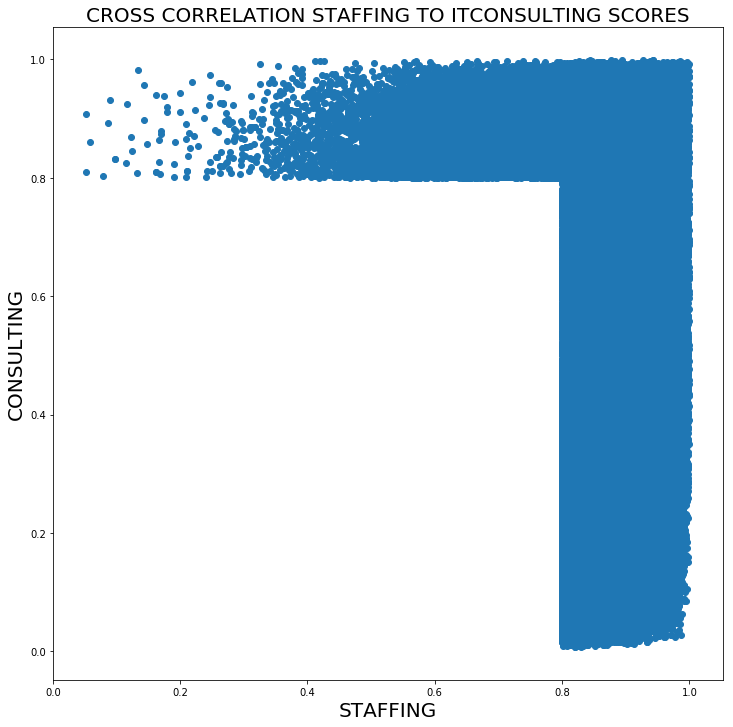

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
plt.title("CROSS CORRELATION STAFFING TO ITCONSULTING SCORES", fontsize = 20)
plt.xlabel('STAFFING', fontsize = 20)
plt.ylabel('CONSULTING', fontsize = 20)
plt.scatter(scored['staffing_score'], scored['itconsult_score'])